In [33]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import seaborn as sns


import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.layers import preprocessing
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
import keras.layers as tfl

## Importing the test and training dataset

In [34]:
training_data = pd.read_csv('sign_mnist_train.csv')
test_data = pd.read_csv('sign_mnist_test.csv')

In [35]:
# Verifying if the dataset has been properly imported or not
training_data.head()
test_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [36]:
# This helps us understand the dataset in more detail and displays the number of rows and columns in the dataset 
print(training_data.shape)
print(test_data.shape)

(27455, 785)
(7172, 785)


## Pre-Processing of the data

In [37]:
# Is used to check for any null values present in the training dataset 
print(training_data.isna().sum())

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64


In [38]:
# Is used to check for any null values present in the test dataset 
print(test_data.isna().sum())

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64


In [39]:
#creating our Y for the training data
Y_train = training_data["label"]

#creating our X for the training data
X_train = training_data.drop(labels = ["label"],axis = 1) 

In [40]:
#creating our Y for the training data
Y_test = test_data["label"]

#creating our X for the training data
X_test = test_data.drop(labels = ["label"],axis = 1) 

In [41]:
# Pixel values are between 0 - 255. Here we convert them to values between 0 - 1

X_train = X_train / 255.0

X_test = X_test / 255.0

In [42]:
# Reshaping the images to 28 X 28 

X_train = X_train.values.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1)
print(X_train.shape)
print(X_test.shape)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


<AxesSubplot: >

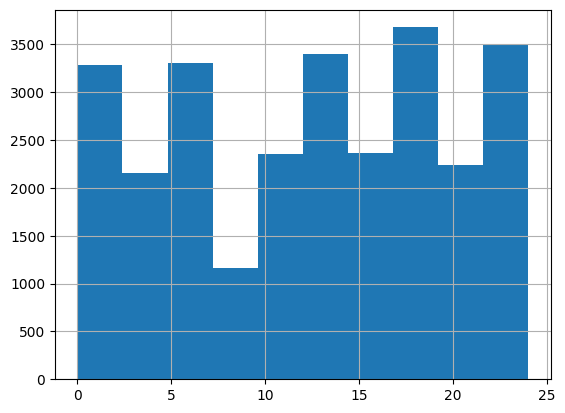

In [43]:
Y_train.hist()

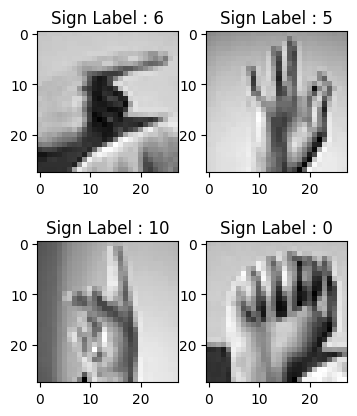

In [57]:
plt.figure(figsize = (4,5))
plt.gray()
for i in range(4):
  plt.subplot(2, 2, i + 1)
  plt.imshow(X_test[i])
  plt.title(f"Sign Label : {Y_test[i]}")

# CNN Model creation

In [63]:

model = keras.Sequential([
    
    layers.BatchNormalization(),
    layers.Conv2D(filters=32, kernel_size=(5,5), activation="relu", padding='same', input_shape=[28, 28, 1]),
    layers.MaxPool2D(),
    layers.Dropout(.25),
    
    layers.BatchNormalization(),
    layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu", padding='same'),
    layers.MaxPool2D(),
    layers.Dropout(.25),
    
    layers.BatchNormalization(),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu", padding='same'),
    layers.MaxPool2D(),
    layers.Dropout(.25),

    layers.BatchNormalization(),
    layers.Conv2D(filters=128, kernel_size=(3,3), activation="relu", padding='same'),
    layers.MaxPool2D(),
    layers.Dropout(.25),
    
    layers.Flatten(),
    layers.Dropout(.25),
    layers.Dense(units=64, activation="relu"),
    layers.Dense(units=26, activation="softmax"),
])

In [64]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(epsilon=0.01),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [67]:
model_history = model.fit(X_train, Y_train, validation_data=(X_test,Y_test), epochs = 10, batch_size=1000)

Epoch 1/10
28/28 [==============================] - 16s 585ms/step - loss: 0.6236 - accuracy: 0.7836 - val_loss: 0.4159 - val_accuracy: 0.8766
Epoch 2/10
28/28 [==============================] - 16s 562ms/step - loss: 0.5796 - accuracy: 0.7970 - val_loss: 0.3834 - val_accuracy: 0.8878
Epoch 3/10
28/28 [==============================] - 15s 546ms/step - loss: 0.5406 - accuracy: 0.8115 - val_loss: 0.3691 - val_accuracy: 0.8840
Epoch 4/10
28/28 [==============================] - 16s 568ms/step - loss: 0.5190 - accuracy: 0.8185 - val_loss: 0.3385 - val_accuracy: 0.8974
Epoch 5/10
28/28 [==============================] - 16s 559ms/step - loss: 0.4906 - accuracy: 0.8288 - val_loss: 0.3150 - val_accuracy: 0.9084
Epoch 6/10
28/28 [==============================] - 17s 625ms/step - loss: 0.4611 - accuracy: 0.8392 - val_loss: 0.3004 - val_accuracy: 0.9113
Epoch 7/10
28/28 [==============================] - 18s 625ms/step - loss: 0.4399 - accuracy: 0.8466 - val_loss: 0.2793 - val_accuracy: 0.9198

Accuracy

225/225 [==============================] - 2s 7ms/step - loss: 0.0191 - accuracy: 0.9940


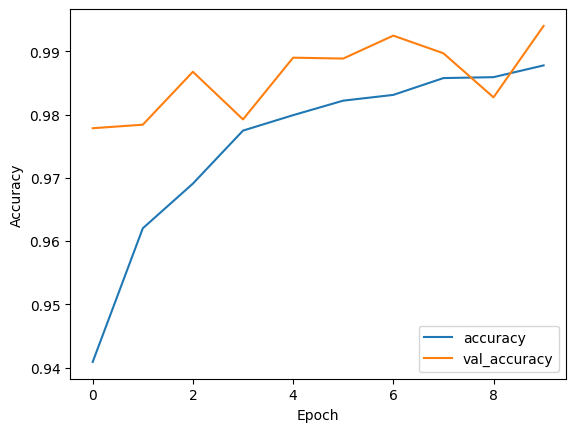

In [ ]:
plt.plot(model_history.history['accuracy'], label='accuracy')
plt.plot(model_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test, Y_test)

Loss

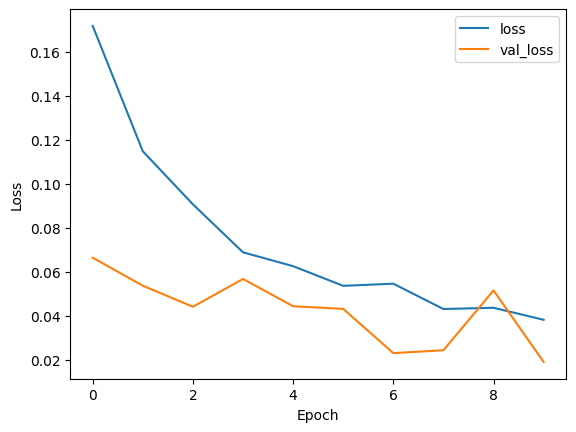

In [ ]:
plt.plot(model_history.history['loss'], label='loss')
plt.plot(model_history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

In [ ]:
print(test_acc)

0.9722532033920288
